### Problem Statement:

To perform Text Classfication of Imdb movie reviews for sentiment analysis. Also, comparing the predicted results with the polarity scores obtained from the Sentiment Intensity Analyser.

### Importing Required Libraries:

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
# Loading the dataset

data_imdb=pd.read_csv("Train.csv")
data_imdb.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [3]:
data_imdb.shape    #40000 rows and 2 columns

(40000, 2)

In [4]:
data_imdb.isnull().sum()    # No null values present

text     0
label    0
dtype: int64

### Text Preprocessing:

In [5]:
sentence=data_imdb['text']
sentence.head()

0    I grew up (b. 1965) watching and loving the Th...
1    When I put this movie in my DVD player, and sa...
2    Why do people who do not know what a particula...
3    Even though I have great interest in Biblical ...
4    Im a die hard Dads Army fan and nothing will e...
Name: text, dtype: object

In [28]:
#Initialising Lemmatizer
lemma=WordNetLemmatizer()

#List of stopwords to discard from the original sentences
stop_words=stopwords.words('english')
stop_words.remove('not')
custom_stopwords=[i for i in string.ascii_lowercase]
custom_stopwords.extend(['br'])
all_stopwords=np.hstack([stop_words,custom_stopwords])



new_sentence=[]
for i in range(len(sentence)):
    # Excluding all meta-chatacters and numbers from the sentences
    word=re.sub("[^a-zA-Z]"," ",sentence[i])
    
    #Lower casing the sentences
    word=word.lower()
    
    #Splitting the sentences to words
    word=word.split()
    
    #Performing Lemmatization which tokenizes the sentences by retaining only the root words.
    word=[lemma.lemmatize(w) for w in word if w not in all_stopwords]
    word=" ".join(word)
    new_sentence.append(word)
    

    

In [29]:
# The original sentences have been pre-processed 
data_imdb['text_new']=new_sentence
data_imdb[['text','text_new']].head()

,text,text_new
0,I grew up (b. 1965) watching and loving the Th...,grew watching loving thunderbird mate school w...
1,"When I put this movie in my DVD player, and sa...",put movie dvd player sat coke chip expectation...
2,Why do people who do not know what a particula...,people not know particular time past like feel...
3,Even though I have great interest in Biblical ...,even though great interest biblical movie bore...
4,Im a die hard Dads Army fan and nothing will e...,im die hard dad army fan nothing ever change g...


### Exploratory Data Analysis:

In [30]:
words=[]
for i in data_imdb["text_new"]:
    word=i.split()
    words.extend(word)

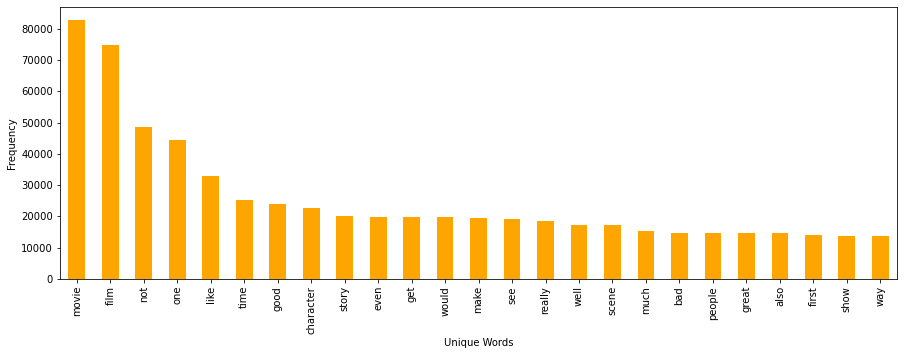

In [35]:
plt.figure(figsize=(15,5))
word_list=pd.Series(words).value_counts()
word_list[:25].plot(kind='bar',color='orange')
plt.xlabel("Unique Words")
plt.ylabel("Frequency")
plt.show()

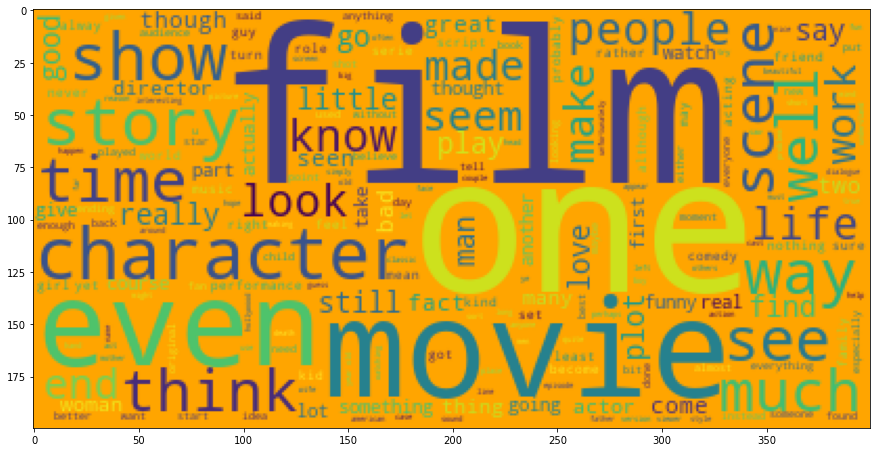

In [42]:
plt.figure(figsize=(15,10))

word_string=" ".join(words)
wc=WordCloud(background_color='orange').generate(word_string)
plt.imshow(wc)
plt.show()

#### Inference: As per the plots seen above, the words film,movie,one etc are the words with the highest frequency. These words will be given the least amount of weightage while building the Tf-IDF matrix.

### Splitting data into Train and Test:

In [114]:
# Splitting data
X_train,X_test,y_train,y_test=train_test_split(data_imdb['text_new'],data_imdb['label'],test_size=0.3,random_state=10)

In [53]:
print("Shape of X-train:",X_train.shape)
print("Shape of X-test:",X_test.shape)
print("Shape of y-train:",y_train.shape)
print("Shape of y-test",y_test.shape)

Shape of X-train: (28000,)
Shape of X-test: (12000,)
Shape of y-train: (28000,)
Shape of y-test (12000,)


### Building Bag of Words Model using TF-IDF:

In [57]:
#Initialising the Tf-Idf vectorizer
vectorizer=TfidfVectorizer(ngram_range=(1, 3)).fit(X_train)

vocab=vectorizer.get_feature_names()


In [59]:
train_dtm = vectorizer.transform(X_train)
test_dtm = vectorizer.transform(X_test)

### Building a Classification model using Multinomial Naive Baye's:

In [71]:
naive_bayes_model = MultinomialNB().fit(train_dtm,y_train)
test_y_pred = naive_bayes_model.predict(test_dtm)

### Evalauting the Model Performance:

In [72]:
print('Accuracy score: ', accuracy_score(y_test, test_y_pred))
print('F1 score: ', f1_score(y_test, test_y_pred, pos_label=1))

Accuracy score:  0.8870833333333333
F1 score:  0.886601389237593


#### Inference: The scores obtained on the test data are 88% accuracy score and 88% F1-score. 

### Sentiment Analysis using Rule Based Algorithm:

In [75]:
# Using the original text :
data_imdb['text'].head()

0    I grew up (b. 1965) watching and loving the Th...
1    When I put this movie in my DVD player, and sa...
2    Why do people who do not know what a particula...
3    Even though I have great interest in Biblical ...
4    Im a die hard Dads Army fan and nothing will e...
Name: text, dtype: object

In [77]:
# Initializing Sentiment Intensity Analyzer 
analyzer=SentimentIntensityAnalyzer()

In [81]:
# Obtaining the compound score of each of the imdb reviews using the polarity score function
data_imdb['compound_score']=data_imdb['text'].apply(lambda a: analyzer.polarity_scores(a)['compound'])

In [83]:
data_imdb[['text','compound_score']].head()

,text,compound_score
0,I grew up (b. 1965) watching and loving the Th...,0.6502
1,"When I put this movie in my DVD player, and sa...",0.9683
2,Why do people who do not know what a particula...,-0.9568
3,Even though I have great interest in Biblical ...,-0.7515
4,Im a die hard Dads Army fan and nothing will e...,0.7469


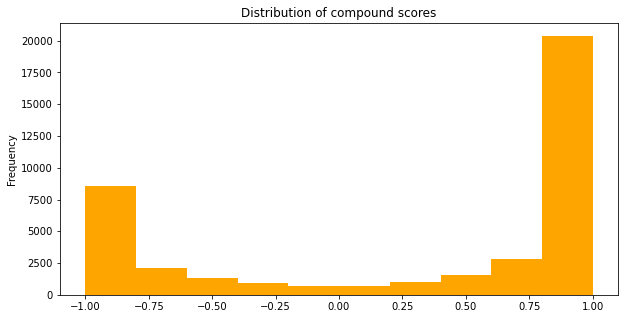

In [89]:
plt.figure(figsize=(10,5))
data_imdb['compound_score'].plot(kind='hist',color='orange')
plt.title("Distribution of compound scores")
plt.show()

#### Inference: The scores are highly distributed towards 1 which means the wositive words within the sentences are more.There is some distribution towards -1 also.

In [90]:
data_imdb['compound_score'].mean()

0.2992414525000012

In [103]:
#Assigning new labels 
label_new=[]
for score in data_imdb['compound_score']:
    if score>0.3:
        label_new.append(1)
    else:
        label_new.append(0)
data_imdb['label_new']=label_new
data_imdb[['text','label_new']].head()

,text,label_new
0,I grew up (b. 1965) watching and loving the Th...,1
1,"When I put this movie in my DVD player, and sa...",1
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


### Evaluating the performance of the Rule Based Model:


In [109]:
# Selecting the respective data for testing
y_test_new=data_imdb.loc[y_test.index]['label_new']

In [115]:
print('Accuracy score: ', accuracy_score(y_test, y_test_new))
print('F1 score: ', f1_score(y_test, y_test_new, pos_label=1))

Accuracy score:  0.7076666666666667
F1 score:  0.7405325443786983


#### Inference: Here, the scores obtained are 70% accuracy score and 74% F1-score.

### Conclusion:

- The imdb reviews were first pre-processed i.e. Meta characters and numbers eliminated,lower-cased and lemmatization was performed on the texts.

- The classification model built gave an accuracy score of 88% and F1 score of 88% on the Test data.

- On using the rule based Algorithm, Sentiment Intensity Analyzer, the compound scores obatined were used to obtain the respective label by setting a threshold (0.3).The new labels obatined gave an accuracy score of 70% and F1-score of 74%.